# Chest Xray Pneumonia Classification

<img src="images/chest_xray.jpeg" alt="Drawing" style="width: 1000px;height:300px;float: left;"/>

## Summary


## Business Understanding

## Data Understanding

In [1]:
import os, shutil
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from keras import regularizers

In [2]:
train_folder = 'chest_xray/train/'
test_folder = 'chest_xray/test/'
val_folder = 'chest_xray/val/'

In [3]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, batch_size=624) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, batch_size=16)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, batch_size=5216)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [4]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [5]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 256, 256, 3)
train_labels shape: (5216, 2)
test_images shape: (624, 256, 256, 3)
test_labels shape: (624, 2)
val_images shape: (16, 256, 256, 3)
val_labels shape: (16, 2)


## Data Preparation

In [6]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 196608)
(624, 196608)
(16, 196608)


In [7]:
train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

## Baseline Model

In [99]:
baseline_model = models.Sequential()
baseline_model.add(layers.Dense(5, activation='relu', input_shape=(196608,))) # 1 hidden layer
baseline_model.add(layers.Dense(2, activation='relu'))
baseline_model.add(layers.Dense(1, activation='sigmoid'))

In [100]:
baseline_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [101]:
history = baseline_model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/50
118/118 [==============================] - 3s 24ms/step - loss: 0.6676 - accuracy: 0.7283 - val_loss: 0.6446 - val_accuracy: 0.7353
Epoch 2/50
118/118 [==============================] - 2s 21ms/step - loss: 0.6313 - accuracy: 0.7310 - val_loss: 0.6173 - val_accuracy: 0.7353
Epoch 3/50
118/118 [==============================] - 2s 19ms/step - loss: 0.6109 - accuracy: 0.7310 - val_loss: 0.6012 - val_accuracy: 0.7353
Epoch 4/50
118/118 [==============================] - 2s 19ms/step - loss: 0.5991 - accuracy: 0.7310 - val_loss: 0.5923 - val_accuracy: 0.7353
Epoch 5/50
118/118 [==============================] - 2s 20ms/step - loss: 0.5924 - accuracy: 0.7310 - val_loss: 0.5869 - val_accuracy: 0.7353
Epoch 6/50
118/118 [==============================] - 2s 17ms/step - loss: 0.5884 - accuracy: 0.7310 - val_loss: 0.5834 - val_accuracy: 0.7353
Epoch 7/50
118/118 [==============================] - 2s 18ms/step - loss: 0.5859 - accuracy: 0.7310 - val_loss: 0.5815 - val_accuracy: 0.7353

In [102]:
# Access the history attribute and store the dictionary
baseline_model_val_dict = history.history
# Print the keys
baseline_model_val_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

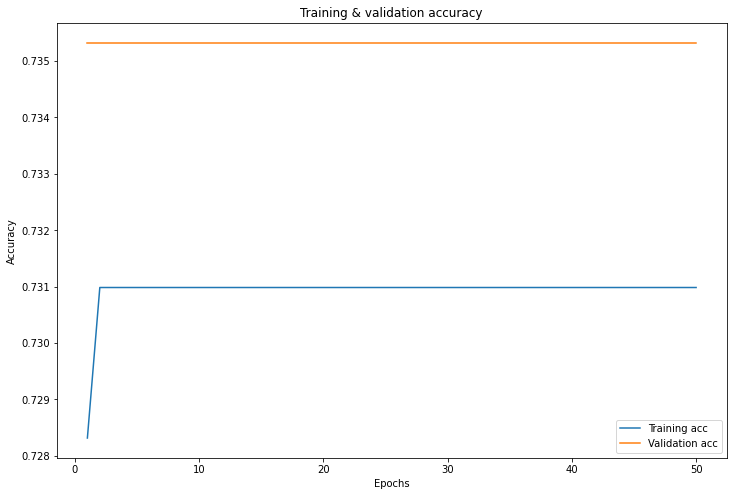

In [103]:
fig, ax = plt.subplots(figsize=(12, 8))

acc_values = baseline_model_val_dict['accuracy'] 
val_acc_values = baseline_model_val_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)
ax.plot(epochs, acc_values, label='Training acc')
ax.plot(epochs, val_acc_values, label='Validation acc')
ax.set_title('Training & validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

## Fourth Model: L2 Regularization

In [ ]:
model_4 = models.Sequential()

# Add the input and first hidden layer
model_4.add(layers.Dense(75, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(196608,)))

# Add another hidden layer
model_4.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.005), activation='relu'))

# Add an output layer
model_4.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_4.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val))

In [ ]:
model_4.evaluate(X_train, y_train)

In [ ]:
model_4.evaluate(X_val, y_val)

## Simple CNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_y, test_size=0.75)

In [ ]:
X_train.shape

In [27]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(6, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Flatten())
model_4.add(layers.Dense(10, activation='relu'))
model_4.add(layers.Dense(1, activation='sigmoid'))

In [28]:
model_4.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
history_4 = model_4.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(val_images, val_y))

Epoch 1/30
21/21 [==============================] - 6s 278ms/step - loss: 0.6482 - accuracy: 0.7239 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
21/21 [==============================] - 6s 273ms/step - loss: 0.6813 - accuracy: 0.7462 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 3/30
21/21 [==============================] - 6s 277ms/step - loss: 0.6704 - accuracy: 0.7462 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 4/30
21/21 [==============================] - 6s 281ms/step - loss: 0.6605 - accuracy: 0.7462 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 5/30
21/21 [==============================] - 6s 276ms/step - loss: 0.6517 - accuracy: 0.7462 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 6/30
21/21 [==============================] - 6s 298ms/step - loss: 0.6439 - accuracy: 0.7462 - val_loss: 0.7008 - val_accuracy: 0.5000
Epoch 7/30
21/21 [==============================] - 6s 295ms/step - loss: 0.6365 - accuracy: 0.7462 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 

In [30]:
model_4.evaluate(X_train, y_train)

41/41 [==============================] - 2s 50ms/step - loss: 0.5747 - accuracy: 0.7462


[0.5746670365333557, 0.7461656332015991]

In [31]:
model_4.evaluate(val_images, val_y)

1/1 [==============================] - 0s 0s/step - loss: 0.7695 - accuracy: 0.5000


[0.7694500684738159, 0.5]

## Overfit CNN

In [13]:
train_images.shape

(5216, 256, 256, 3)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_y, test_size=0.75)

In [15]:
X_train.shape

(1304, 256, 256, 3)

In [16]:
model_5 = models.Sequential()
model_5.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Flatten())
model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model_5.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history_5 = model_5.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(val_images, val_y))

Epoch 1/30
21/21 [==============================] - 45s 2s/step - loss: 0.5889 - accuracy: 0.7446 - val_loss: 0.8683 - val_accuracy: 0.5000
Epoch 2/30
21/21 [==============================] - 48s 2s/step - loss: 0.5577 - accuracy: 0.7462 - val_loss: 0.7504 - val_accuracy: 0.5000
Epoch 3/30
21/21 [==============================] - 48s 2s/step - loss: 0.5222 - accuracy: 0.7477 - val_loss: 1.1930 - val_accuracy: 0.5000
Epoch 4/30
21/21 [==============================] - 46s 2s/step - loss: 0.5170 - accuracy: 0.7738 - val_loss: 1.1984 - val_accuracy: 0.5000
Epoch 5/30
21/21 [==============================] - 46s 2s/step - loss: 0.4894 - accuracy: 0.7883 - val_loss: 0.5996 - val_accuracy: 0.7500
Epoch 6/30
21/21 [==============================] - 48s 2s/step - loss: 0.4572 - accuracy: 0.7968 - val_loss: 0.5909 - val_accuracy: 0.7500
Epoch 7/30
21/21 [==============================] - 48s 2s/step - loss: 0.4185 - accuracy: 0.8206 - val_loss: 0.8136 - val_accuracy: 0.5000
Epoch 8/30
21/21 [==

In [19]:
model_5.evaluate(X_train, y_train)

41/41 [==============================] - 7s 165ms/step - loss: 0.1190 - accuracy: 0.9624


[0.119005486369133, 0.9624233245849609]

In [20]:
model_5.evaluate(val_images, val_y)

1/1 [==============================] - 0s 16ms/step - loss: 0.3574 - accuracy: 0.8125


[0.3573865294456482, 0.8125]

## Dropout CNN

In [32]:
model_6 = models.Sequential()
model_6.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Dropout(0.3))

model_6.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Dropout(0.3))

model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Dropout(0.3))

model_6.add(layers.Flatten())
model_6.add(layers.Dense(64, activation='relu'))
model_6.add(layers.Dropout(0.3))
model_6.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model_6.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
history_6 = model_6.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(val_images, val_y))

Epoch 1/30
21/21 [==============================] - 51s 2s/step - loss: 0.5836 - accuracy: 0.7416 - val_loss: 0.7293 - val_accuracy: 0.5000
Epoch 2/30
21/21 [==============================] - 49s 2s/step - loss: 0.5447 - accuracy: 0.7531 - val_loss: 0.7384 - val_accuracy: 0.5000
Epoch 3/30
21/21 [==============================] - 49s 2s/step - loss: 0.4937 - accuracy: 0.7669 - val_loss: 0.7016 - val_accuracy: 0.5000
Epoch 4/30
21/21 [==============================] - 50s 2s/step - loss: 0.4853 - accuracy: 0.7684 - val_loss: 0.6660 - val_accuracy: 0.6250
Epoch 5/30
21/21 [==============================] - 49s 2s/step - loss: 0.4555 - accuracy: 0.8029 - val_loss: 0.6629 - val_accuracy: 0.6250
Epoch 6/30
21/21 [==============================] - 49s 2s/step - loss: 0.4221 - accuracy: 0.8014 - val_loss: 0.7273 - val_accuracy: 0.5625
Epoch 7/30
21/21 [==============================] - 48s 2s/step - loss: 0.3579 - accuracy: 0.8428 - val_loss: 0.5903 - val_accuracy: 0.6250
Epoch 8/30
21/21 [==

In [35]:
model_6.evaluate(X_train, y_train)

41/41 [==============================] - 7s 177ms/step - loss: 0.1716 - accuracy: 0.9578


[0.1715882420539856, 0.9578220844268799]

In [36]:
model_6.evaluate(val_images, val_y)

1/1 [==============================] - 0s 0s/step - loss: 0.4188 - accuracy: 0.8750


[0.41880542039871216, 0.875]

## Reduced Complexity with Dropout

In [37]:
model_7 = models.Sequential()
model_7.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
model_7.add(layers.MaxPooling2D((2, 2)))
model_7.add(layers.Dropout(0.3))

model_7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_7.add(layers.MaxPooling2D((2, 2)))
model_7.add(layers.Dropout(0.3))

model_7.add(layers.Flatten())
model_7.add(layers.Dense(64, activation='relu'))
model_7.add(layers.Dropout(0.3))
model_7.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model_7.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
history_7 = model_7.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(val_images, val_y))

Epoch 1/30
21/21 [==============================] - 43s 2s/step - loss: 0.7207 - accuracy: 0.7109 - val_loss: 0.7189 - val_accuracy: 0.5000
Epoch 2/30
21/21 [==============================] - 43s 2s/step - loss: 0.5407 - accuracy: 0.7462 - val_loss: 0.7014 - val_accuracy: 0.5000
Epoch 3/30
21/21 [==============================] - 44s 2s/step - loss: 0.5268 - accuracy: 0.7515 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 4/30
21/21 [==============================] - 44s 2s/step - loss: 0.4785 - accuracy: 0.7600 - val_loss: 0.6341 - val_accuracy: 0.6875
Epoch 5/30
21/21 [==============================] - 44s 2s/step - loss: 0.4717 - accuracy: 0.7784 - val_loss: 0.7859 - val_accuracy: 0.5000
Epoch 6/30
21/21 [==============================] - 45s 2s/step - loss: 0.4449 - accuracy: 0.8006 - val_loss: 0.8297 - val_accuracy: 0.5000
Epoch 7/30
21/21 [==============================] - 44s 2s/step - loss: 0.4308 - accuracy: 0.8137 - val_loss: 0.6556 - val_accuracy: 0.5625
Epoch 8/30
21/21 [==

## Final Model Evaluation

## Conclusion

## Next Steps